# ISE 291 Final Project

## Names and ID
- Group 2
- Alaqsa Akbar, 202281480
- Abdulilah AlShammary, 202063340

## Main Objectives

The main objective is to learn about how different factors affect video game reception (i.e. whether the video games has been well accepted or not)

## Dataset

The dataset can be found at: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings/data

Data Set Description:

"This dataset consists of records from Metacritic providing insight into global video game ratings and sales. Traditionally categorised by genre, publisher, platform and rating, this data also includes additional descriptive attributes such as 'story focus', 'gameplay focus', and whether it is a 'series game'. These unique descriptors give valuable perspective on the video game industry, presenting an invaluable resource to evaluate the effect of focusing on storytelling upon video game sales and ratings.

The wide-reaching implications of this data are immense - from understanding complex customer ‘gamer’ engagement processes across different markets & genres to exploring how narrative elements have become increasingly commonplace in popular titles. In addition to traditional research topics ranging from rating vs success relationships or the importance of series games in retention - all these aspects combined present endless possibilities for deeper studies into an ever-evolving field!

Ultimately, this dataset gives researchers the power to profoundly analyse trends within the gaming market with informative and expansive details regarding popularity - helping developers craft engaging experiences for all customers worldwide. Henceforth we invite you on a journey into uncovering surprising revelations that may form part of wider conversations & culture surrounding gaming!"


Data Fields Description:

| Field           | Description                                             |
|-----------------|---------------------------------------------------------|
| Name            | The name of the video game. (String)                    |
| Platform        | The platform the game was released on. (String)         |
| Year_of_Release | The year the game was released. (Integer)               |
| Genre           | The genre of the game. (String)                         |
| Publisher       | The publisher of the game. (String)                     |
| NA_Sales        | The sales of the game in North America. (Float)         |
| EU_Sales        | The sales of the game in Europe. (Float)                |
| JP_Sales        | The sales of the game in Japan. (Float)                 |
| Other_Sales     | The sales of the game in other regions. (Float)         |
| Global_Sales    | The total sales of the game across all regions. (Float) |
| Critic_Scores   | The score given to the game by critics. (Float)         |
| Critic_Count    | The number of critics who reviewed the game. (Integer)  |
| User_Score      | The score given to the game by users. (Float)           |
| User_Count      | The number of users who reviewed the game. (Integer)    |
| Developer       | The developer of the game. (String)                     |
| Rating          | The rating of the game. (String)                        |

# Main Work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Read the selected data, list the fields/variables, and identify their types.

In [2]:
df = pd.read_csv('Raw Data.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# The fields/variables and their respective types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### List the inconsistencies, missing data, and outliers. Fix the inconsistencies, impute the missing data, and remove the outliers.

*User_Score* should be of type *float64*

In [4]:
# Removing all rows that will create a ValueError at conversion
non_numeric_rows = pd.to_numeric(df['User_Score'], errors='coerce').isnull()
df = df.loc[~non_numeric_rows].copy()

# Converting to float
df['User_Score'] = df['User_Score'].astype(float)
df['User_Score'].dtypes

dtype('float64')

In [5]:
#Now we will take a look at the basic statisticla summaries of the columns

display(df.describe()) #Numerical columns


display(df.select_dtypes(include = 'object').describe())

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,7463.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7017.000000,7017.000000,7590.000000,7590.000000
mean,2007.686855,0.375816,0.224893,0.059092,0.079389,0.739368,70.249822,28.783241,7.125046,162.229908
std,4.296115,0.925928,0.658169,0.273972,0.258532,1.875659,13.880646,19.167119,1.500006,561.282326
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2004.000000,0.050000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.400000,10.000000
50%,2008.000000,0.140000,0.060000,0.000000,0.020000,0.280000,72.000000,24.000000,7.500000,24.000000
75%,2011.000000,0.370000,0.200000,0.010000,0.070000,0.720000,80.000000,39.000000,8.200000,81.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


,Name,Platform,Genre,Publisher,Developer,Rating
count,7590,7590,7590,7584,7579,7504
unique,4694,17,12,280,1368,8
top,Madden NFL 07,PS2,Action,Electronic Arts,EA Sports,T
freq,9,1241,1830,1026,163,2561


In [6]:
# Listing columns with NaN
columns_with_na = df.columns[df.isna().any()].tolist()
columns_with_na

['Year_of_Release',
 'Publisher',
 'Critic_Score',
 'Critic_Count',
 'Developer',
 'Rating']

In [7]:
# Print the number of nas in each column
for column in columns_with_na:
    print(f'{column} has {df[column].isna().sum()} nas')

Year_of_Release has 127 nas
Publisher has 6 nas
Critic_Score has 573 nas
Critic_Count has 573 nas
Developer has 11 nas
Rating has 86 nas


It can be seen that *Critic_Score* and *Critic_Count* have too many nas to impute, therefore the rows with na will be removed

In [8]:
# Print categorical columns with unknown values
for column in df.select_dtypes(include='object'):
    print(column + ':', 'Unknown' in df[column].unique())

Name: False
Platform: False
Genre: False
Publisher: True
Developer: False
Rating: False


In [9]:
# Replace Unknown with Na
df['Publisher'].replace('Unknown', pd.NA, inplace=True)

In [10]:
# Impute data
for column in columns_with_na:
    if df[column].dtypes == 'object':
        df[column].fillna(df[column].mode().iloc[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16685,Worms 2,PC,1997.0,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01,70.249822,28.783241,8.1,12.0,Team 17,K-A
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.000000,20.000000,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.000000,12.000000,5.8,43.0,Atomic Games,T
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,60.000000,12.000000,7.2,13.0,SimBin,E10+


In [11]:
# Confirm that there are no na values
for column in columns_with_na:
    print(f'{column} has {df[column].isna().sum()} nas')

Year_of_Release has 0 nas
Publisher has 0 nas
Critic_Score has 0 nas
Critic_Count has 0 nas
Developer has 0 nas
Rating has 0 nas


In [12]:
print(df['Year_of_Release'].unique()) # Making sure all years are integers

#There is one weird value in the set that should be removed

[2006.         2008.         2009.         2005.         2007.
 2010.         2013.         2004.         2002.         2001.
 2011.         2012.         2014.         1997.         1999.
 2015.         2016.         2003.         1998.         1996.
 2000.         2007.68685515 1994.         1985.         1992.
 1988.        ]


In [13]:
df.drop(df[df['Year_of_Release'] == 2007.686855152084].index, inplace = True) # Unnatural value in the set

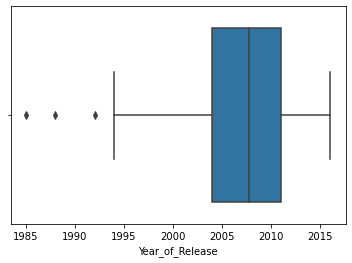

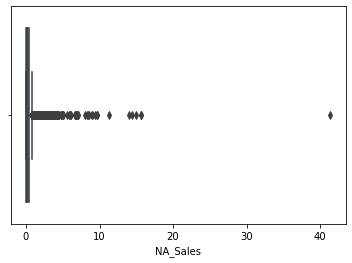

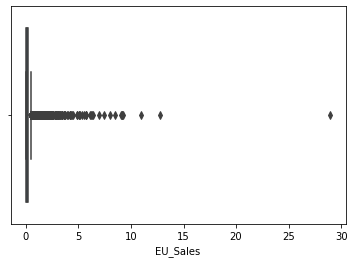

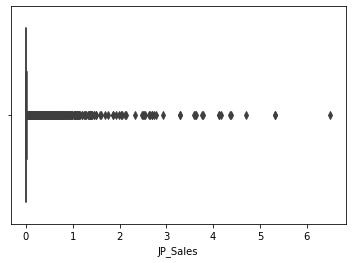

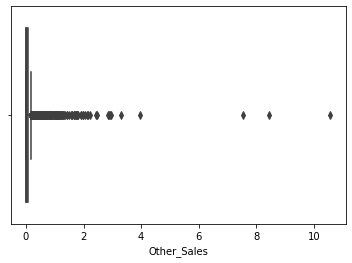

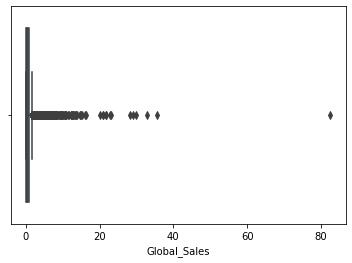

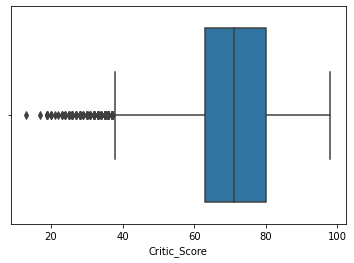

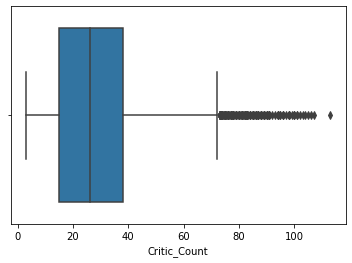

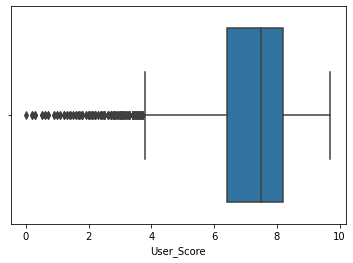

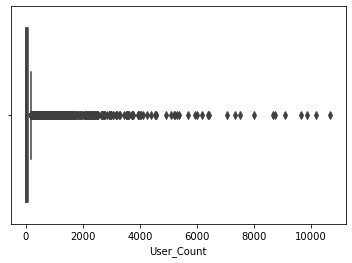

In [14]:
#Removing the outliers

##Before we remove the outliers, we  want to check their natures and why there are outliers

import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(exclude = 'object').columns

for column in numeric_columns:
  plt.figure()
  sns.boxplot(data = df, x = column)
  plt.show()


#It can be seen that most of the dataset is contained of outliers, this is because the difference in the distribution in the columns
#Take the Global sales as an example, anything that is larger than 0 by a small value will be considered an outlier
#This is because many games published are not famous worldwide and not known to many players
#Such outliers are called true or natural outliers and will not be removed

#However for the Year_of_Release column, most of our dataset is within the range of 1994 to 2016,
#so anything before 1994 or after 2016 should be removed as not many games in our dataset were published during that time

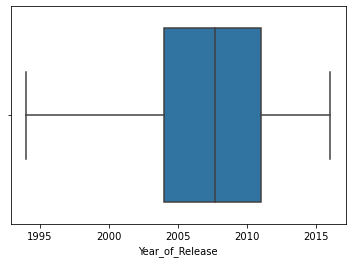

In [15]:
#We will remove the outliers from the Year column using the IQR outlier method

target_column = df['Year_of_Release']

Q1 = np.percentile(target_column, 25)

Q3 = np.percentile(target_column, 75)

IQR = Q3 - Q1

outlier_mask = (target_column < Q1 - IQR * 1.5) | (target_column > Q3 + IQR * 1.5) # Identifying the outliers in the column

df.drop(df.loc[outlier_mask,'Year_of_Release'].index, inplace = True) # dropping the outliers from the dataset

plt.figure()
sns.boxplot(data = df, x = 'Year_of_Release')
plt.show()

#It can be seen that the outliers are now removed

In [16]:
#We will drop the name column since it does not contribute to our model but store it in a Series in case we need to query the name of the game

df.reset_index(drop = True, inplace = True)
name_column = df['Name']
df.drop('Name', axis = 1, inplace = True)

df

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.0,322.0,Nintendo,E
1,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.0,Nintendo,E
2,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.0,192.0,Nintendo,E
3,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.5,431.0,Nintendo,E
4,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,PC,1997.0,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01,70.249822,28.783241,8.1,12.0,Team 17,K-A
7583,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.000000,20.000000,7.6,412.0,Kojima Productions,M
7584,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.000000,12.000000,5.8,43.0,Atomic Games,T
7585,PC,2011.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,60.000000,12.000000,7.2,13.0,SimBin,E10+


#Data Transformation

###This part includes standardizing or using MinMaxScalers on numeric columns, and one-hot encoding / label encoding on categorical columns

In [17]:
#Before transforoming the data, it is better to know how many unique values are in each column

columns = df.select_dtypes(include = 'object').columns

#We will display the number of unique values in each column and the unique values if they are no more than 10
for column in columns:
  number_unique = df[column].nunique()
  print("Number of unique values in column " +str(column) + " is "+ str(number_unique))
  if number_unique <= 10:
    print(df[column].unique())

Number of unique values in column Platform is 17
Number of unique values in column Genre is 12
Number of unique values in column Publisher is 277
Number of unique values in column Developer is 1367
Number of unique values in column Rating is 8
['E' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [18]:
#Let us see how many values of each rating there is.

df.groupby('Rating').count()

#It can be seen that the AO, RP, K-A all have few occurunces only, and hence will be removed from the set

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
Rating,,,,,,,,,,,,,,
AO,1,1,1,1,1,1,1,1,1,1,1,1,1,1
E,2375,2375,2375,2375,2375,2375,2375,2375,2375,2375,2375,2375,2375,2375
E10+,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042
EC,1,1,1,1,1,1,1,1,1,1,1,1,1,1
K-A,3,3,3,3,3,3,3,3,3,3,3,3,3,3
M,1517,1517,1517,1517,1517,1517,1517,1517,1517,1517,1517,1517,1517,1517
RP,2,2,2,2,2,2,2,2,2,2,2,2,2,2
T,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646


In [19]:
df.drop(df[df['Rating'].isin(['AO','RP','K-A','EC'])].index ,inplace = True)

In [20]:
df['Rating'].unique()

array(['E', 'M', 'T', 'E10+'], dtype=object)

In [21]:
df.to_csv('Cleaned Data.csv') # Save the cleaned data to a csv (Probably we will use it again for data visualization)

It can be seen that some columns have too many unique values and is nominal data, we can not use label encoding which might assume ordering, and we can not use one hot encoding which consumes a lot of memory and increases the dimensionality of the set greatly.

Hence we can use frequency encoding, which proves efficient for nominal data with high cardinality (number of unique values). Frequency encoding maps the categorical value to the number of times (or maybe the percentage) the value is found in the column. * 1

1. Platform --> One Hot Encoding (Nominal Data / Is not ordered)

2. Year_of_Release --> MinMaxScaler (Year is not normally distributed and has short known range for the numbers)

3. Genre --> One Hot Encoding (Nominal Data)

4. Publisher --> Frequency Encoding (Nominal Data)

5. NA_Sales & EU_SALES & JP_Sales & Other_Sales --> We map it to the proportion of Global_Sales. e.g., for NA_Sales, we use NA_Sales / Global_Sales

6. Global_Sales --> StandardScaler

7. Critic_Score --> MinMaxScaler (range is known (0 - 100 at max))

8. Critic_Count --> StandardScaler

9. User_Score --> MinMaxScaler (range is known (0 - 10 at max))

10. User_Count --> StandardScaler

11. Developer --> Frequency Encoding

12. Rating --> Label Encoding (Ordinal Data / Data is ordered)


1: Source : It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data. Replace the categories with the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset.

It can help if frequency correlates with the target and also, it can help the model to understand that smaller categories are less trustworthy than bigger ones, especially when frequency encoding is used parallel with other types of encoding.
(https://datascience.stackexchange.com/questions/63749/why-does-frequency-encoding-work)

In [22]:
#We start with One Hot Encoding

df = pd.get_dummies(df, columns = ['Platform','Genre'], drop_first = True) #one hot encoding and drop the first column

#Proportion for Sales column

df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].div(df['Global_Sales'].values, axis = 0) #divide row-wise

df


,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2006.0,Nintendo,0.501151,0.350903,0.045680,0.102387,82.53,76.0,51.0,8.0,...,0,0,0,0,0,0,0,0,1,0
1,2008.0,Nintendo,0.441441,0.359234,0.106700,0.092624,35.52,82.0,73.0,8.3,...,0,0,0,0,1,0,0,0,0,0
2,2009.0,Nintendo,0.476350,0.333537,0.100092,0.090021,32.77,80.0,73.0,8.0,...,0,0,0,0,0,0,0,0,1,0
3,2006.0,Nintendo,0.378523,0.306711,0.218121,0.096644,29.80,89.0,65.0,8.5,...,0,0,1,0,0,0,0,0,0,0
4,2006.0,Nintendo,0.482711,0.317427,0.101314,0.098202,28.92,58.0,41.0,6.6,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,2002.0,Midway Games,1.000000,0.000000,0.000000,0.000000,0.01,81.0,12.0,8.8,...,1,0,0,0,0,0,0,0,0,0
7583,2014.0,Konami Digital Entertainment,0.000000,1.000000,0.000000,0.000000,0.01,80.0,20.0,7.6,...,0,0,0,0,0,0,0,0,0,0
7584,2011.0,Destineer,1.000000,0.000000,0.000000,0.000000,0.01,61.0,12.0,5.8,...,0,0,0,0,0,0,1,0,0,0
7585,2011.0,Electronic Arts,0.000000,1.000000,0.000000,0.000000,0.01,60.0,12.0,7.2,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.501151,0.350903,0.045680,0.102387,82.53
1,0.441441,0.359234,0.106700,0.092624,35.52
2,0.476350,0.333537,0.100092,0.090021,32.77
3,0.378523,0.306711,0.218121,0.096644,29.80
4,0.482711,0.317427,0.101314,0.098202,28.92
...,...,...,...,...,...
7581,1.000000,0.000000,0.000000,0.000000,0.01
7583,0.000000,1.000000,0.000000,0.000000,0.01
7584,1.000000,0.000000,0.000000,0.000000,0.01
7585,0.000000,1.000000,0.000000,0.000000,0.01


In [24]:
#StandardScaler and MinMaxScaler

from sklearn.preprocessing import StandardScaler,MinMaxScaler

standard_scaler = StandardScaler()
df[['Global_Sales','Critic_Count','User_Count']] = standard_scaler.fit_transform(df[['Global_Sales','Critic_Count','User_Count']])

minmax_scaler = MinMaxScaler()
df[['Year_of_Release','Critic_Score','User_Score']] = minmax_scaler.fit_transform(df[['Year_of_Release','Critic_Score','User_Score']])

df

,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.545455,Nintendo,0.501151,0.350903,0.045680,0.102387,43.587687,0.741176,1.205996,0.824742,...,0,0,0,0,0,0,0,0,1,0
1,0.636364,Nintendo,0.441441,0.359234,0.106700,0.092624,18.535191,0.811765,2.400094,0.855670,...,0,0,0,0,1,0,0,0,0,0
2,0.681818,Nintendo,0.476350,0.333537,0.100092,0.090021,17.069665,0.788235,2.400094,0.824742,...,0,0,0,0,0,0,0,0,1,0
3,0.545455,Nintendo,0.378523,0.306711,0.218121,0.096644,15.486897,0.894118,1.965877,0.876289,...,0,0,1,0,0,0,0,0,0,0
4,0.545455,Nintendo,0.482711,0.317427,0.101314,0.098202,15.017929,0.529412,0.663224,0.680412,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,0.363636,Midway Games,1.000000,0.000000,0.000000,0.000000,-0.388744,0.800000,-0.910815,0.907216,...,1,0,0,0,0,0,0,0,0,0
7583,0.909091,Konami Digital Entertainment,0.000000,1.000000,0.000000,0.000000,-0.388744,0.788235,-0.476597,0.783505,...,0,0,0,0,0,0,0,0,0,0
7584,0.772727,Destineer,1.000000,0.000000,0.000000,0.000000,-0.388744,0.564706,-0.910815,0.597938,...,0,0,0,0,0,0,1,0,0,0
7585,0.772727,Electronic Arts,0.000000,1.000000,0.000000,0.000000,-0.388744,0.552941,-0.910815,0.742268,...,0,0,0,0,0,0,0,0,0,1


In [25]:
#Frequnecy encoding for Publisher and Developer columns

publisher_proportion = df.groupby('Publisher').size() / len(df['Publisher']) # Finding the proportion values for Publisher column

df['Publisher'] = df['Publisher'].map(publisher_proportion) #Mapping the proportions to the actual column


developer_proportion = df.groupby('Developer').size() / len(df['Developer']) # Do the same to the developer columns

df['Developer'] = df['Developer'].map(developer_proportion)


In [26]:
#Label Encoding for Rating (Suitable age to play)

#E : Everyone (6+) - Order : 0
#M : Mature (17+) - Order: 3
#T : Teen (13+) - Order: 2
#E10+: Everyone 10+ - Order : 1

rating_mapping = {
    'E' : 0, 'M' : 3, 'T' : 2, 'E10+' : 1
}

df['Rating'] = df['Rating'].map(rating_mapping)

df['Rating']

0       0
1       0
2       0
3       0
4       0
       ..
7581    3
7583    3
7584    2
7585    1
7586    2
Name: Rating, Length: 7580, dtype: int64

# Model Planning

##In this part, we will try to find relationships between features and target columns using exploratory data analysis and data visualization technique. We will mostly rely on the pre-transformed data for visualization as it is easier for the human to understand and make decisions from.

### Run the exploratory data analysis:

Find the statistical summaries

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,7580.0,6.226886e-01,0.192678,0.000000,0.454545,0.622130,0.772727,1.000000
Publisher,7580.0,4.819641e-02,0.045996,0.000132,0.015303,0.038786,0.073483,0.145515
NA_Sales,7580.0,5.347063e-01,0.272341,0.000000,0.375000,0.533719,0.750000,1.000000
EU_Sales,7580.0,2.984585e-01,0.242031,0.000000,0.114559,0.272727,0.400000,1.000000
JP_Sales,7580.0,7.000065e-02,0.182909,0.000000,0.000000,0.000000,0.011772,1.000000
Other_Sales,7580.0,8.945858e-02,0.077062,0.000000,0.037037,0.085980,0.125000,0.900000
Global_Sales,7580.0,-1.804933e-15,1.000066,-0.388744,-0.335452,-0.244856,-0.010372,43.587687
Critic_Score,7580.0,6.734928e-01,0.157028,0.000000,0.588235,0.682353,0.788235,1.000000
Critic_Count,7580.0,7.683593e-15,1.000066,-1.399309,-0.747983,-0.150934,0.500392,4.571182
User_Score,7580.0,7.346000e-01,0.154537,0.000000,0.659794,0.773196,0.845361,1.000000


In [28]:
df_cleaned = pd.read_csv('Cleaned Data.csv') # read the cleaned and pre transformed data into a DataFrame

df_cleaned

,Unnamed: 0,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,1,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,2,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,3,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,4,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7575,7581,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
7576,7583,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
7577,7584,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
7578,7585,PC,2011.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+


In [29]:
df_cleaned.drop('Unnamed: 0', axis = 1, inplace = True)

<AxesSubplot:xlabel='Platform', ylabel='count'>

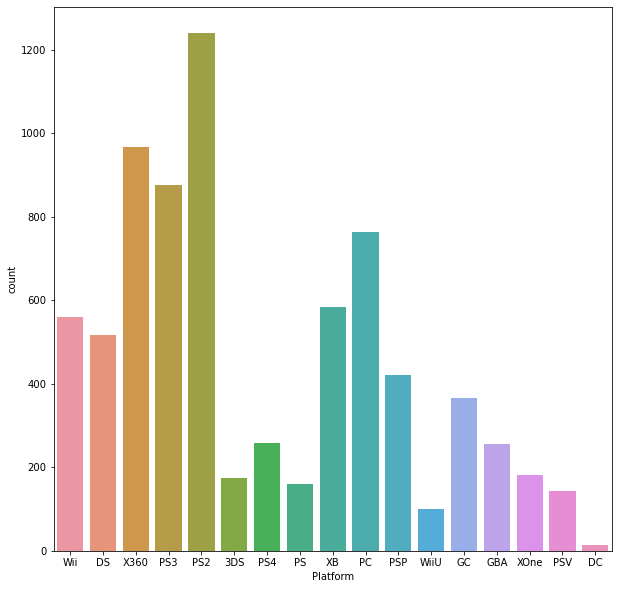

In [30]:
#Let us investigate individual columns before starting to form relationships across multiple columns

plt.figure(figsize = (10,10))
sns.countplot(data = df_cleaned, x = 'Platform')

##It can be seen that the PS2,PS3, and Xbox 360 are the top  3 consoles for playing video games. Since this dataset was up to 2016 only, it is very possible
##that the top platforms now have changed.

<AxesSubplot:xlabel='User_Score', ylabel='Count'>

<AxesSubplot:xlabel='Critic_Score', ylabel='Count'>

,User_Score,Critic_Score
mean,7.12562,70.246886
median,7.50000,71.000000


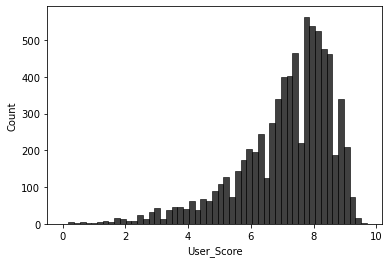

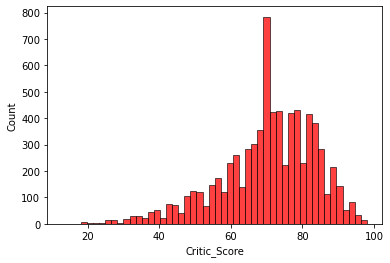

In [31]:
#Let us check the distribution of the User Scores and Critic Scores

display(sns.histplot(data = df_cleaned, x = 'User_Score', color = 'black'))
plt.figure()
display(sns.histplot(data = df_cleaned, x = 'Critic_Score', color = 'red'))
df_cleaned[['User_Score','Critic_Score']].agg([np.mean,np.median])

#It is easy to notice that both the user score and the critic score are skewed left (median larger than mean)
#It also can be noticed that most of the critic scores are centered between 70 - 80 out of 100 and for the user score values are centered around 8 - 9 out of 10
#but user scores also have more low scores than the critic score

#The reason for this is because users are often biased and are not playing to review the game, they are playing for fun, if they enjoy, they give a high rating
#If they do not enjoy the game, they give a low rating. On the other hand, critics review the game critically and focus on its weak points and strengths and on
#the minor details that average players do not notice. Hence, giving a better overall review of the game

User_Score,False,True
Rating,,
E,527,1848
E10+,255,787
M,299,1218
T,433,2213


Ratios between above average games and below average games for each rating: 


Rating
E       3.506641
E10+    3.086275
M       4.073579
T       5.110855
dtype: float64

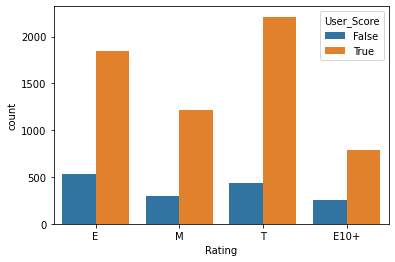

In [32]:
AVERAGE_SCORE = 6 #Let us assume that the score 6 out of 10 is the benchmark between good and bad games

sns.countplot(x = df_cleaned['Rating'], hue = df_cleaned['User_Score'] > AVERAGE_SCORE)


df_crosstab = pd.crosstab( index = df_cleaned['Rating'],columns = df_cleaned['User_Score'] > AVERAGE_SCORE)

display(df_crosstab)

print("Ratios between above average games and below average games for each rating: ")
display(df_crosstab[True].div(df_crosstab[False], axis = 0))

#it can be seen that most games in each category have more good games than bad games

#However, it can be also seen  that games with rating T and M have a higher ratio of good games compared to E and E10+ ratings

#For T, the ratio is 5.16 which means that for approximately 5 to 6 good games, there is one bad game

<AxesSubplot:xlabel='Global_Sales', ylabel='Rating'>

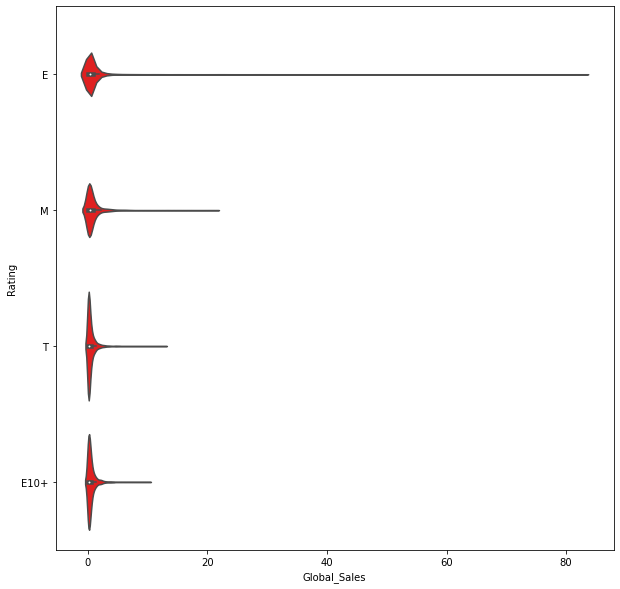

In [33]:
#Let us compare the sales in each region and see if there is a general difference

plt.figure(figsize = (10,10))
sns.violinplot(data = df_cleaned, x = 'Global_Sales', y = 'Rating', color = 'red')


<AxesSubplot:xlabel='Year_of_Release', ylabel='User_Score'>

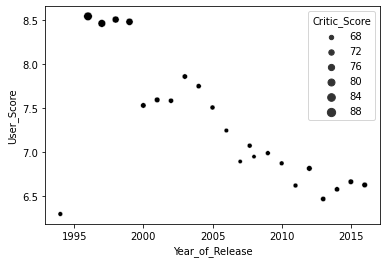

In [34]:
#Let us start by visualizing the user score across the years, along with the critic score as

score_by_year = df_cleaned.groupby('Year_of_Release')[['User_Score','Critic_Score']].mean() # Average score per year

sns.scatterplot(x = score_by_year.index, y = score_by_year['User_Score'], size = score_by_year['Critic_Score'], alpha = 1, color = 'black')


# From the plot, it is clear that older games generally tend to have a higher User score than games that are recently released, which could indicate the taste of
# gamers in games worldwide. Not only user scores follow that trend, but also critic scores follow the same trend, it can be seen that as the years pass,
#the critic score (or the point size) decreases

<AxesSubplot:>

Text(0.5, 1.0, 'Pre-Transformed Data - Numerical Only')

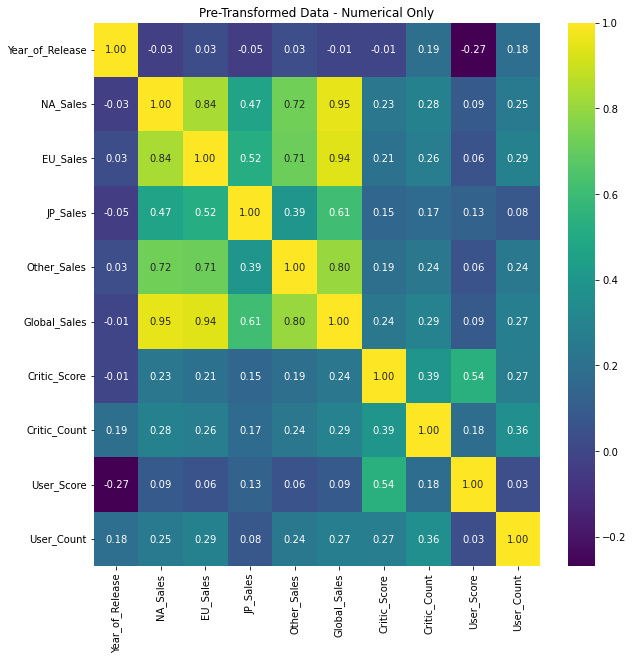

In [35]:
#Let us view the correlation between the columns of the pre_transformed DataFrame (it will be difficult to understand the correlation after transforming the dataframe)
#Also it will be hard to visualize with more than 40 columns
plt.figure(figsize = (10,10))
display(sns.heatmap(df_cleaned.corr(), cmap = 'viridis', annot = True , fmt = '.2f'))
plt.title('Pre-Transformed Data - Numerical Only')



Text(0.5, 1.0, 'Average Global Sales for Platform Vs Rating')

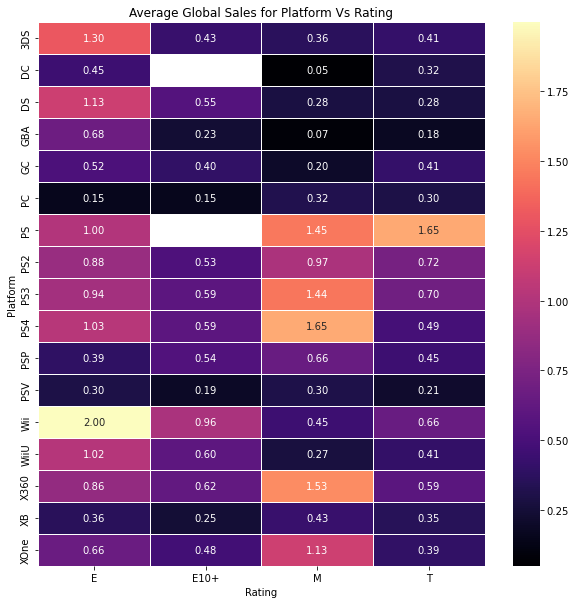

In [36]:
#Let us plot the average global sales depending on the Rating and Platform

pt = pd.pivot_table(data = df_cleaned, index = 'Platform', columns = 'Rating', values = 'Global_Sales', aggfunc = np.mean)

plt.figure(figsize = (10,10))
sns.heatmap(pt, cmap = 'magma', annot = True, fmt = '.2f', linewidth = 1)
plt.title('Average Global Sales for Platform Vs Rating')

#From the heatmap below, we can find the highest average sales per platform or per rating
#For games with rating M (mature), modern devices or platforms such as PS4, or Xbox 360 have the highest average sales
#Hence game developers, can know what audience to target from their games and what platforms should the game be released on

# Model Building

This is the part where we will build the ML model that will predict the target column, which is User Score.
We will have regression models

1- Linear Regression - possibly with Ridge and Lasso regression (if needed)

2- XGBoost (Gradient Boosting)

3- Neural Networks

For the model evaluation, we will use the MSE (mean square error) metric



In [37]:
df.head()

,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.545455,0.038786,0.501151,0.350903,0.045680,0.102387,43.587687,0.741176,1.205996,0.824742,...,0,0,0,0,0,0,0,0,1,0
1,0.636364,0.038786,0.441441,0.359234,0.106700,0.092624,18.535191,0.811765,2.400094,0.855670,...,0,0,0,0,1,0,0,0,0,0
2,0.681818,0.038786,0.476350,0.333537,0.100092,0.090021,17.069665,0.788235,2.400094,0.824742,...,0,0,0,0,0,0,0,0,1,0
3,0.545455,0.038786,0.378523,0.306711,0.218121,0.096644,15.486897,0.894118,1.965877,0.876289,...,0,0,1,0,0,0,0,0,0,0
4,0.545455,0.038786,0.482711,0.317427,0.101314,0.098202,15.017929,0.529412,0.663224,0.680412,...,0,1,0,0,0,0,0,0,0,0


In [38]:
df.drop('User_Score', axis=1).columns

Index(['Year_of_Release', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Count', 'Developer', 'Rating', 'Platform_DC', 'Platform_DS',
       'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XB', 'Platform_XOne', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy'],
      dtype='object')

In [39]:
#Before building a model, we have to split it into training and testing sets

from sklearn.model_selection import train_test_split

X = df.drop('User_Score', axis = 1).values # Features matrix
y = df['User_Score'].values # Target vector

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.3, random_state = 42) # Splitting the data to testing and training

## Model 1: Linear Regression Model (OLS)**bold text**
We will start by performing a simple Linear Regression Model using the closed form formula

β=(X′X)−1 X′Y

To include y-intercept (B0) to the weights vector, the X matrix should  have an additional column vector at the beginning with all values as 1.

Note: X' is the transpose of X

In [40]:
ones_vector_train = np.ones(X_train.shape[0]).reshape(-1,1)
ones_vector_test = np.ones(X_test.shape[0]).reshape(-1,1)

X_train_regression = np.concatenate((ones_vector_train,X_train), axis = 1) # Add the ones vector to the beginning
X_test_regression = np.concatenate((ones_vector_test,X_test), axis = 1) # Add the ones vector to the beginning


weights = np.array(np.linalg.inv(X_train_regression.T @ X_train_regression) @ X_train_regression.T @ y_train)# Calculating the weights using the closed form formula
weights = weights.reshape(-1,1)
weights.shape # should be (40,1), same as number of columns + 1

(40, 1)

In [41]:
def predict(X): # X should be a matrix of size (n, 39) or a vector of size (39,)
  ones_vector = np.ones(X.shape[0]).reshape(-1,1)
  X_final = np.concatenate((ones_vector,X), axis = 1)
  return X_final @ weights

y_predict = predict(X_test)

In [42]:
def mse(y_true, y_pred): # y_true and y_pred should be vectors of equal length
  return np.sum((y_true.flatten() - y_pred.flatten()) ** 2) / y_true.shape[0]

display("Mean Square Error: " +str(mse(y_test,y_predict)))

'Mean Square Error: 0.013813811114161387'

'Slope is 0.9916228196142215'

'Intercept is 0.0026756857621289365'

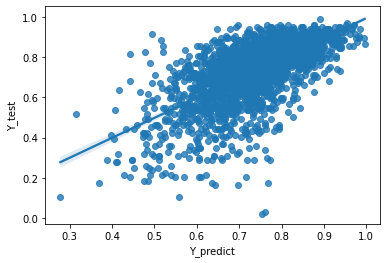

In [43]:
#Let us plot the graph of y_test vs y_predict

#A graph with slope of approximately 1  and 0 y-intercept indicates good model performance
test_vs_predict = pd.DataFrame({'Y_test': y_test, 'Y_predict' : y_predict.flatten()})
sns.regplot(data = test_vs_predict,x = 'Y_predict', y = 'Y_test', scatter = True, fit_reg = True)
slope, intercept = np.polyfit(y_predict.flatten(), y_test, 1) # Find the regression equation of this relation

display("Slope is " + str(slope))
display("Intercept is " + str(intercept))

#The slope is 0.9916 and the y-intercept is 0.002 which satisfies the requirements in the comment above, hence indicating a good model performance

Now when we predict through the function, we get the post-transformed value of User_Score, if we want to get the pre-transformed value, we reverse the min max scaling

x_transformed = (x_actual - x_min) / (x_max - x_min)

x_actual = x_transformed * (x_max - x_min) + x_min



'Slope is 0.9916228196142212'

'Intercept is 0.025954151892651725'

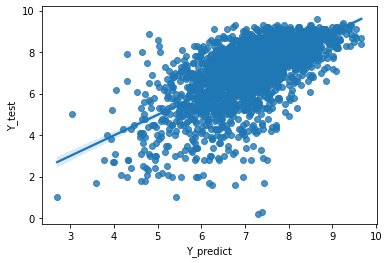

In [44]:
def return_actual(y): #y is a vector of any length
  max = minmax_scaler.data_max_[2] # 2 is the index of the User Score column in the MinMax Scaler above
  min = minmax_scaler.data_min_[2]
  y_actual = y * (max - min) + min
  return y_actual

#Predict the actual user score
def predict_actual(X): # X is a matrix of size (n,39) or a vector of size (39,)
  y_pred = predict(X)
  y_actual = return_actual(y_pred)
  return y_actual

y_predict_actual = predict_actual(X_test)
y_test_actual = return_actual(y_test)
test_vs_predict = pd.DataFrame({'Y_test': y_test_actual, 'Y_predict' : y_predict_actual.flatten()})
sns.regplot(data = test_vs_predict,x = 'Y_predict', y = 'Y_test', scatter = True, fit_reg = True)


slope, intercept = np.polyfit(y_predict_actual.flatten(), y_test_actual, 1) # Find the regression equation of this relation

display("Slope is " + str(slope))
display("Intercept is " + str(intercept))

#Again, the model satisfies the conditions, even after rescaling, which is a good sign of the model performance.

Since our model is performing greatly without Lasso or Ridge penalties, we will not need to make a model with Ridge or Lasso regression

We will skip directly to to the XGBoost model

## Model 2: XGBoost Regression Model

Gradient boosting is an algorithm used by XGBoost model. Basically an XGBoost model is similar to a random forest model with some extra variations. XGBoost model gives a higher chance to pick the entries with high error from the sampling in the next decision tree. The final output is the sum of average weights decision trees.

e.g.

y = a1 * Tree1 + a2 * Tree2 + a3 * Tree3 + ..... + an * Treen
where the sum of a1 to an must be 1.

In [45]:
import xgboost as xg

n_estimators_list = [10,30,50,100] # Manual grid search to find the best number of estimators or decision trees

for estimator in n_estimators_list:

  xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = estimator, seed = 123)
  # Fitting the model
  xgb_r.fit(X_train, y_train)

  # Predict the model
  y_pred = xgb_r.predict(X_test)

  print("For estimator = "+ str(estimator) + "\nThe MSE is : " + str(mse(y_test,y_pred)))

#It can be seen that for all estimators, the MSE error is the best when the number of estimators is 30.

#Moreover, it can be seen that the XGBoost model beats the Linear Regression model in terms of MSE

#XGBoost MSE: 0.01265
#Linear Regression MSE: 0.01381

#Hence the XGBoost model is better

For estimator = 10
The MSE is : 0.012843048542997296
For estimator = 30
The MSE is : 0.012655189254463742
For estimator = 50
The MSE is : 0.012891744111626456
For estimator = 100
The MSE is : 0.013612355631479018


In [46]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 30, seed = 123) #Fitting the best estimator
# Fitting the model
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model 3: Neural Networks

Neural networks depend on layers of matrix multiplicaation and a non-linear function called activation function to get the output. Each layer has n units that extract and learn from the features in the dataset without the manual intervention of human beings

Neural networks are more prone to overfitting without a large dataset and proper weight regularization

In [47]:
import tensorflow as tf

from tensorflow.keras import *

nn_model = Sequential(
    [
        layers.Dropout(0.05), #Drop 5% of the values randomly to reduce overfitting
        layers.Dense(32, activation = 'relu'),
        layers.Dense(12, activation = 'relu'),
        layers.Dense(1) # Final neuron (no activation to get the linear regression output)
    ]
)

#Adam optimizer is a mathematically complex optimizer. It is one of the best for gradient descent
nn_model.compile(optimizer = 'adam', metrics = 'mse',loss = 'mean_squared_error')
nn_model.fit(x = X_train, y = y_train , epochs = 200, validation_split = 0.2, batch_size = 128)
# Validation split to generalize on validation set before testing on test set




Epoch 1/200


34/34 [==============================] - 1s 5ms/step - loss: 0.1992 - mse: 0.1992 - val_loss: 0.0873 - val_mse: 0.0873
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0643 - mse: 0.0643 - val_loss: 0.0467 - val_mse: 0.0467
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0423 - mse: 0.0423 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 0.022

34/34 [==============================] - 0s 2ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 56/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 57/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 58/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 59/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 60/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 61/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 62/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0

34/34 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 118/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 119/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 120/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 121/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 122/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 123/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 124/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0129 -

Epoch 179/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 180/200
34/34 [==============================] - 0s 1ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 181/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 182/200
34/34 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 183/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 184/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 185/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 186/200
34/34 [==============================] - 0s 2ms/step - 

In [49]:
y_pred = nn_model.predict(X_test)

print("Neural Network MSE: " + str(mse(y_test,y_pred)))

#It can be seen that the MSE of the neural network is less than that of XGBoost and Linear Regression OLS model. This is most probably because after data transformation
#we have many columns, and the data size is relatively small for a neural network, which makes learning features harder and raises overfitting problems

#Neural Network MSE: 0.01525
#XGBoost MSE: 0.01265
#Linear Regression MSE: 0.01381

72/72 [==============================] - 0s 606us/step
Neural Network MSE: 0.014621780266153711


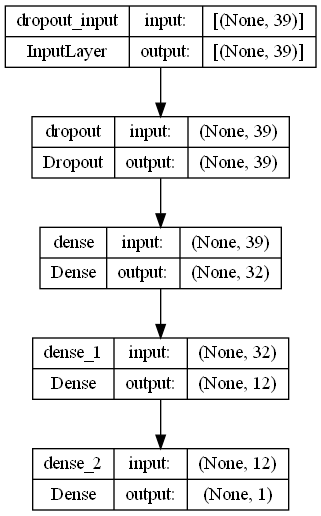

In [58]:
from tensorflow.keras.utils import plot_model

plot_model(nn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Operationalize

1. Discovery
    1. First, download the available csv files and import the data set. This is a form of indirect data collection
2. Data Preparation
    1. Clean the data by resolving incosistencies
    2. Impute missing data
3. Model Planning
    1. Perform an exploratory analysis
        1. Check for any patterns in univariate graphs (histograms and count plots)
        2. Check for any patterns between 2 fields (bivariate graphs such as scatter plots)
        3. Check for any patterns between several fields (multivariate graphs such as heatmaps)
        4. Make sure to check for correlations
    2. Identify your independent variables and your target (dependent) output variable
    3. Transform your data accordingly:
        1. Platform --> One Hot Encoding (Nominal Data / Is not ordered)
        2. Year_of_Release --> MinMaxScaler (Year is not normally distributed and has short known range for the numbers)
        3. Genre --> One Hot Encoding (Nominal Data)
        4. Publisher --> Frequency Encoding (Nominal Data)
        5. NA_Sales & EU_SALES & JP_Sales & Other_Sales --> We map it to the proportion of Global_Sales. e.g., for NA_Sales, we use NA_Sales / Global_Sales
        6. Global_Sales --> StandardScaler
        7. Critic_Score --> MinMaxScaler (range is known (0 - 100 at max))
        8. Critic_Count --> StandardScaler
        9. User_Score --> MinMaxScaler (range is known (0 - 10 at max))
        10. User_Count --> StandardScaler
        11. Developer --> Frequency Encoding
        12. Rating --> Label Encoding (Ordinal Data / Data is ordered
4. Model Building
    1. Split your data into training and testing data, in this project a test size of 0.3 was used
    2. Choose several appropiate methods, for this project, linear regression, XGBoost regression, and a neural network were used
    3. Compare the test MSE values of the different models and choose the appropiate model

Some issues in this methodology include:
- The naturally high count of outliers
- Lack of understanding why each field affects the result accordingly
- Lack of more diverse data
- The success of a game depends on outside factors as well
- Game success is highly unpredictable
- Dataset had too many null values

## Conclusion

To conclude, we managed to create a model (XGBoost Regression) that accurately predicts the User_Score using given data. As such, we achieved our intended goal. We also noticed several trends and patterns between different fields. For instance, Sales between US and EU seemed to be correlated as opposted to with Japan. Moreover, the correlation between user scores and critic scores is significantly weaker than expected. It can also be observed that games with E rating sold very well. In addition, games with T rating tended to have better scores as opposed to games with an E10+ rating.

To improve this project, we may use a different data set that has more information, this one had too many null values. We can also use a more diverse data set that gives information on more fields. Our data set was also a bit too small for a proper neural network.